# Import necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Load and Preprocess dataset

In [68]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("adult.csv")

In [69]:
# Print first rows the dataset
print(df.shape)
print(df.loc[0:10])

(48842, 15)
    age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   

        marital-status         occupation   relationship   race  gender  \
0        Never-married  Machine-op-inspct      Own-child  Black    Male   
1   Married-civ-spous

In [79]:
# Drop rows with any missing values

df.replace("?", pd.NaT, inplace=True)
df = df.dropna()

In [81]:
print(df.shape)
print(df)

(45222, 15)
       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse  

# Visualize dataset

In [83]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

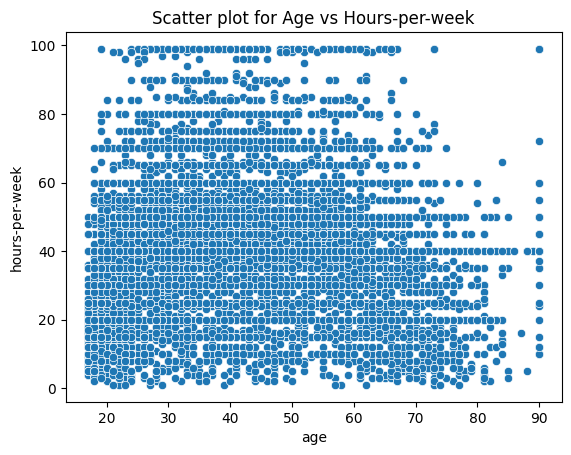

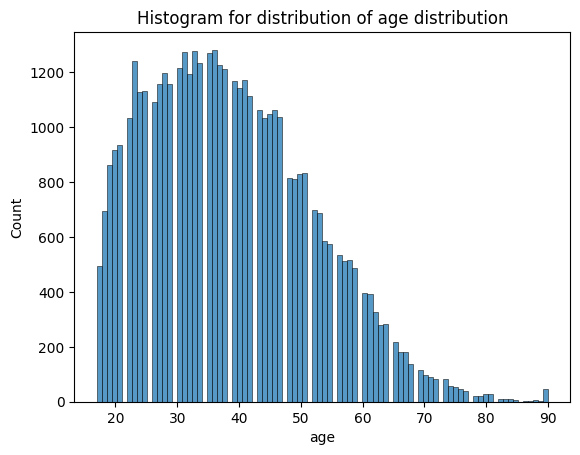

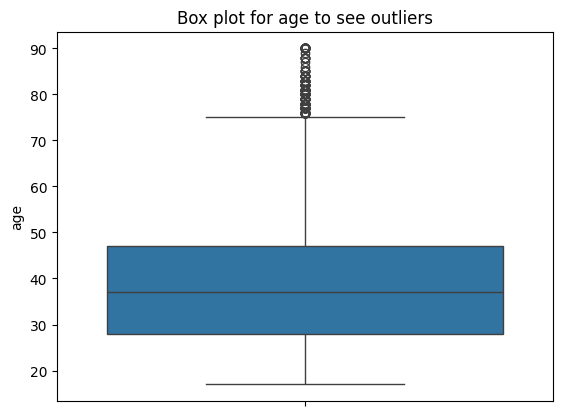

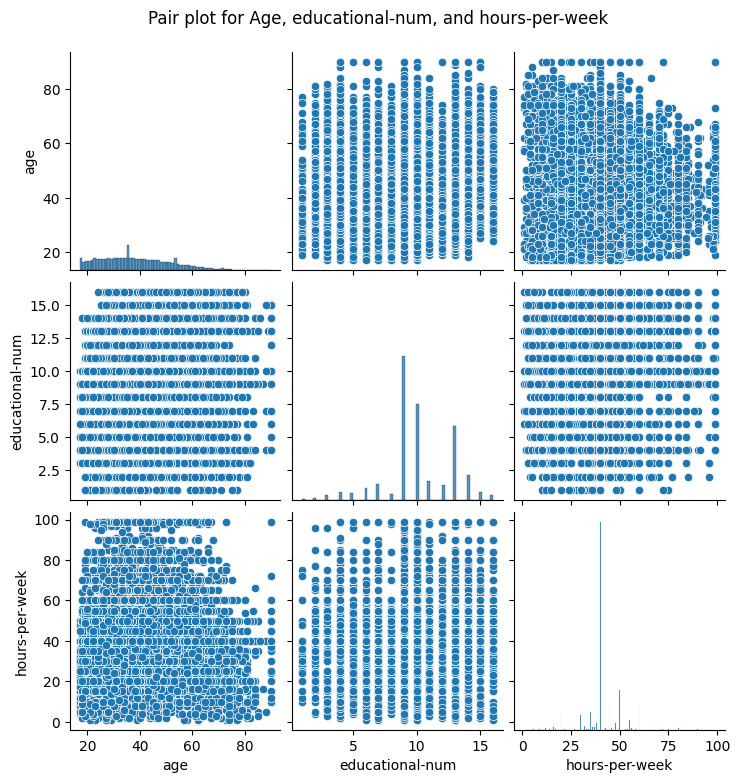

In [107]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:
sns.scatterplot(data=df, x="age", y="hours-per-week")
plt.title("Scatter plot for Age vs Hours-per-week")

plt.show()




# Histogram for distribution of age distribution

# your code here:

sns.histplot(data=df["age"], bins=90)
plt.title("Histogram for distribution of age distribution")
plt.show()



# Box plot for age to see outliers

# your code here:
sns.boxplot(data=df["age"])
plt.title("Box plot for age to see outliers")
plt.show()


# Pair plot for Age, education-num, and hours-per-week

# your code here:
sns.pairplot(df[["age", "educational-num", "hours-per-week"]])
plt.title("Pair plot for Age, educational-num, and hours-per-week", y=3.2, x=-0.65)
plt.show()




# Encode and Normalize dataset

In [112]:
# Use one-hot endcoding to convert categorical features into numerical format

df_encoded = pd.get_dummies(df)
print(df_encoded)

       age  fnlwgt  educational-num  capital-gain  capital-loss  \
0       25  226802                7             0             0   
1       38   89814                9             0             0   
2       28  336951               12             0             0   
3       44  160323               10          7688             0   
5       34  198693                6             0             0   
...    ...     ...              ...           ...           ...   
48837   27  257302               12             0             0   
48838   40  154374                9             0             0   
48839   58  151910                9             0             0   
48840   22  201490                9             0             0   
48841   52  287927                9         15024             0   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0                  40                  False                False   
1                  50                  False             

In [115]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()
# your code here:
scaled_features = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(scaled_features, columns=df_encoded.columns)
print(scaled_df)

            age    fnlwgt  educational-num  capital-gain  capital-loss  \
0     -1.024983  0.350889        -1.221559     -0.146733      -0.21878   
1     -0.041455 -0.945878        -0.438122     -0.146733      -0.21878   
2     -0.798015  1.393592         0.737034     -0.146733      -0.21878   
3      0.412481 -0.278420        -0.046403      0.877467      -0.21878   
4     -0.344079  0.084802        -1.613277     -0.146733      -0.21878   
...         ...       ...              ...           ...           ...   
45217 -0.873671  0.639611         0.737034     -0.146733      -0.21878   
45218  0.109857 -0.334735        -0.438122     -0.146733      -0.21878   
45219  1.471665 -0.358060        -0.438122     -0.146733      -0.21878   
45220 -1.251951  0.111279        -0.438122     -0.146733      -0.21878   
45221  1.017729  0.929516        -0.438122      1.854773      -0.21878   

       hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0           -0.078120              -0.1791

# Implement PCA from Scratch

In [116]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.


# your code here:
def pca(X, num_components):
    # Standardize the data
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero for constant features
    X_scaled = (X - X_mean)
    print("X_std = ", X_std)
    
    # Compute covariance matrix
    covariance_matrix = np.cov(X_scaled, rowvar=False)
    
    # Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select the top num_components eigenvectors
    principal_components = eigenvectors[:, :num_components]
    
    # Project the data onto the principal components
    projected_data = np.dot(X_scaled, principal_components)
    
    return projected_data



In [121]:
df_pca_2d = pca(scaled_df, num_components=2)
print(df_pca_2d.shape)

X_std =  age                             1.0
fnlwgt                          1.0
educational-num                 1.0
capital-gain                    1.0
capital-loss                    1.0
                               ... 
native-country_United-States    1.0
native-country_Vietnam          1.0
native-country_Yugoslavia       1.0
income_<=50K                    1.0
income_>50K                     1.0
Length: 106, dtype: float64
(45222, 2)


# Visualize the PCA-reduced data

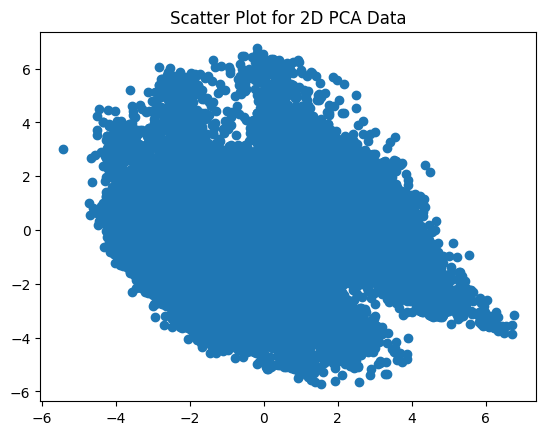

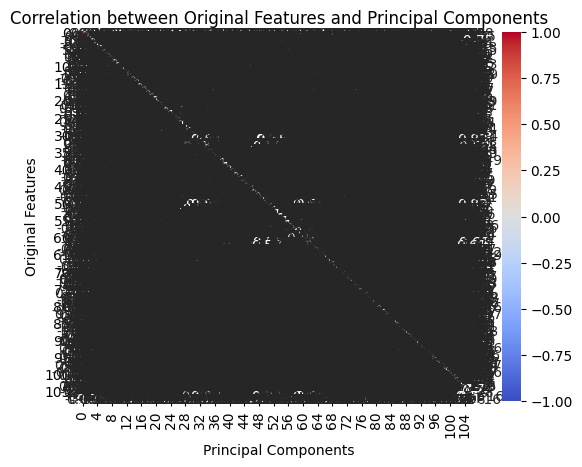

In [123]:

# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

# your code here:
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1])
plt.title("Scatter Plot for 2D PCA Data")
plt.show()



# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

correlation_matrix = np.corrcoef(scaled_df.T, df_pca_2d.T)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()



